#Question 1

# Question 2


# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10

# Question 11

# Question 12

# Question 13

# Question 14

# Question 15

# Question 16

# Question 17

# 2: Exraction & Exploration of Google+ network Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Dataset extraction
import os
import tarfile

drive_path = '/content/drive/My Drive/gplus.tar.gz'
extract_dir = 'gplus'

# Check if file exists
if os.path.exists(drive_path):
    print("File found, extracting...")
    os.makedirs(extract_dir, exist_ok=True)
    with tarfile.open(drive_path, "r:gz") as tar:
        tar.extractall(extract_dir)
    print("Extraction complete.")
else:
    print("File not found. Check the path.")

File found, extracting...
Extraction complete.


In [11]:
# Print content of gplus directory
for root, dirs, files in os.walk("gplus"):
    print(f"Directory: {root}")
    for file in files[:5]:  # Print a few files
        print("   └──", file)

Directory: gplus
Directory: gplus/gplus
   └── 101133961721621664586.feat
   └── 107040353898400532534.featnames
   └── 101626577406833098387.feat
   └── 110241952466097562819.circles
   └── 103537112468125883734.followers


In [13]:
# Print content of first few .circles files
for file in os.listdir('gplus/gplus'):
    if file.endswith(".circles"):
        print(f"\n--- {file} ---")
        with open(os.path.join('gplus/gplus', file), "r") as f:
            for line in f:
                print(line.strip())
        break  # Print only the first few


--- 110241952466097562819.circles ---
9mENop2BfTg	103650208770613583188
3RSyt9yB8p2	103650208770613583188


In [17]:
# Print number of users with >2 circles
valid_users = []

for file in os.listdir('gplus/gplus'):
    if file.endswith(".circles"):
        path = os.path.join('gplus/gplus', file)

        with open(path, "r") as f:
            # Count lines as number of circles
            circle_lines = [line.strip() for line in f if line.strip()]
            num_circles = len(circle_lines)

            if num_circles > 2:
                user_id = file.split(".")[0]
                valid_users.append(user_id)

print(f"Users with >2 circles: {len(valid_users)}")

Users with >2 circles: 57


In [30]:
from itertools import islice

# Get all the .circles files
circle_files = [file for file in os.listdir('gplus/gplus') if file.endswith(".circles")]

# Print number of circles for the first 5 users
for file in islice(circle_files, 5):
    path = os.path.join('gplus/gplus', file)
    with open(path, "r") as f:
        num_lines = sum(1 for line in f if line.strip())
        print(f"{file}: {num_lines} circles")

110241952466097562819.circles: 2 circles
104105354262797387583.circles: 10 circles
116807883656585676940.circles: 3 circles
108883879052307976051.circles: 3 circles
114104634069486127920.circles: 2 circles


# Question 18

In [2]:
import os
import networkx as nx

data_dir = "gplus/gplus"
personal_networks = {}  # Dictionary to store user_id → DiGraph

circle_files = [f for f in os.listdir(data_dir) if f.endswith(".circles")]

for file in circle_files:
    user_id = file.split(".")[0]
    circle_path = os.path.join(data_dir, file)

    with open(circle_path, "r") as f:
        circles = [line.strip() for line in f if line.strip()]
        if len(circles) <= 2:
            continue  # Skip users with 2 or fewer circles

    edge_path = os.path.join(data_dir, f"{user_id}.edges")
    if not os.path.exists(edge_path):
        continue  # Skip users without .edges file

    # Build the directed graph from the .edges file
    G = nx.DiGraph()
    with open(edge_path, "r") as f:
        for line in f:
            u, v = line.strip().split()
            G.add_edge(u, v)

    # Store the graph in a dictionary
    personal_networks[user_id] = G

print(f"Total directed personal networks created: {len(personal_networks)}")

Total directed personal networks created: 57


Total Number of personal networks = 57

# Question 19

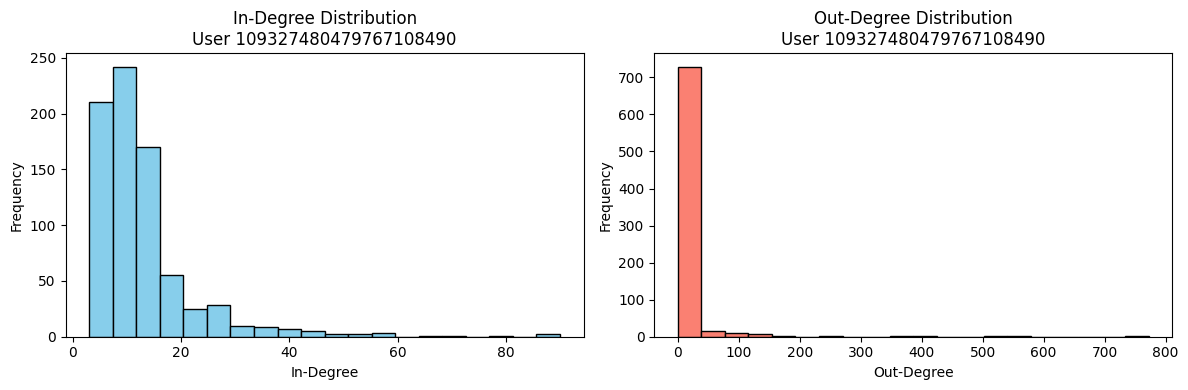

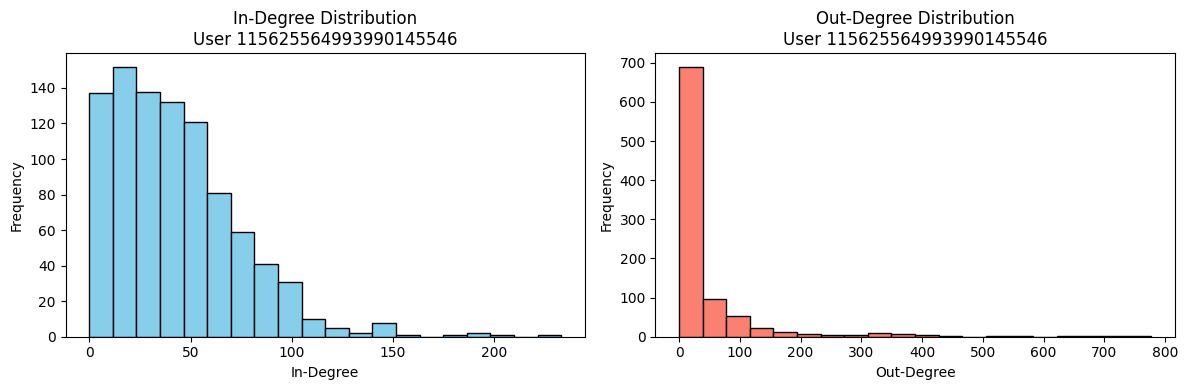

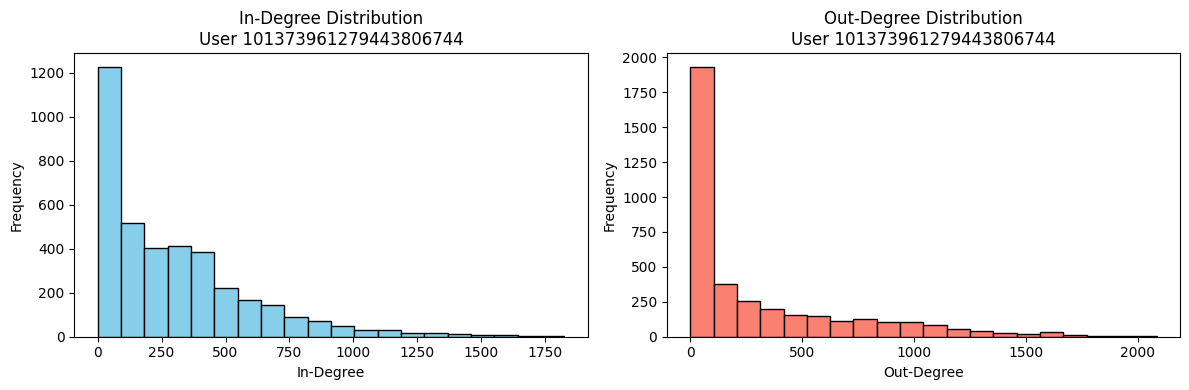

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

user_ids = [
    "109327480479767108490",
    "115625564993990145546",
    "101373961279443806744"
]

def plot_degrees(user_id, data_dir):
    edge_path = os.path.join(data_dir, f"{user_id}.edges")

    if not os.path.exists(edge_path):
        print(f"Edges file not found for user {user_id}")
        return

    G = nx.DiGraph()

    with open(edge_path, "r") as f:
        for line in f:
            u, v = line.strip().split()
            G.add_edge(u, v)

    in_degrees = [d for n, d in G.in_degree()]
    out_degrees = [d for n, d in G.out_degree()]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(in_degrees, bins=20, color="skyblue", edgecolor="black")
    plt.title(f"In-Degree Distribution\nUser {user_id}")
    plt.xlabel("In-Degree")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(out_degrees, bins=20, color="salmon", edgecolor="black")
    plt.title(f"Out-Degree Distribution\nUser {user_id}")
    plt.xlabel("Out-Degree")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot for each of the 3 users
for uid in user_ids:
    plot_degrees(uid, data_dir)

# Question 20

In [36]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.4 MB/s eta 0:00:00


User 109327480479767108490 — Walktrap Modularity: 0.2577
Skipping edge drawing for user 109327480479767108490 (too many edges: 9070)


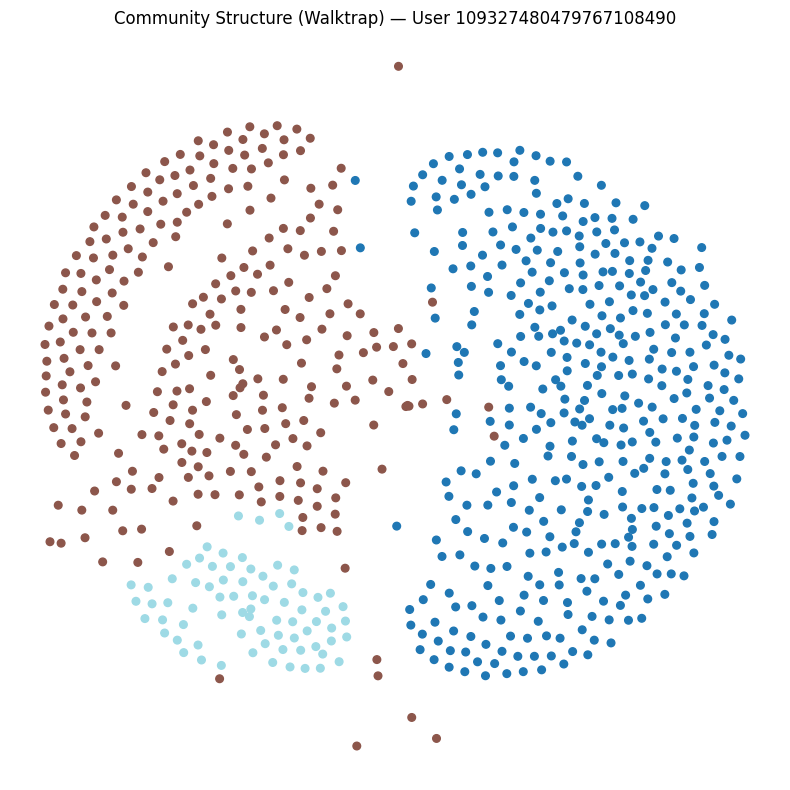

User 115625564993990145546 — Walktrap Modularity: 0.3087
Skipping edge drawing for user 115625564993990145546 (too many edges: 34022)


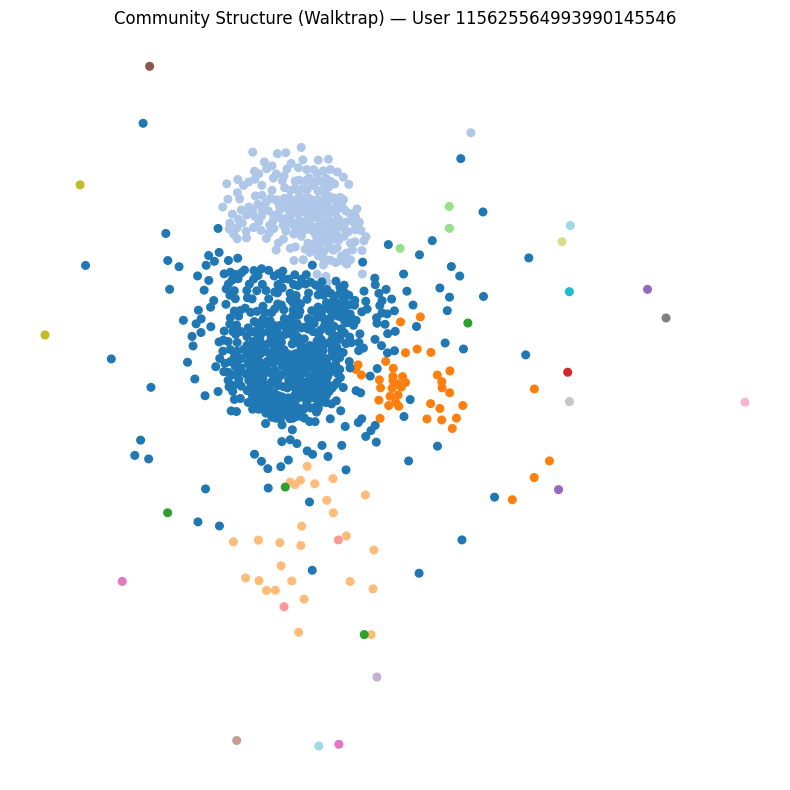

User 101373961279443806744 — Walktrap Modularity: 0.1734
Skipping edge drawing for user 101373961279443806744 (too many edges: 954581)


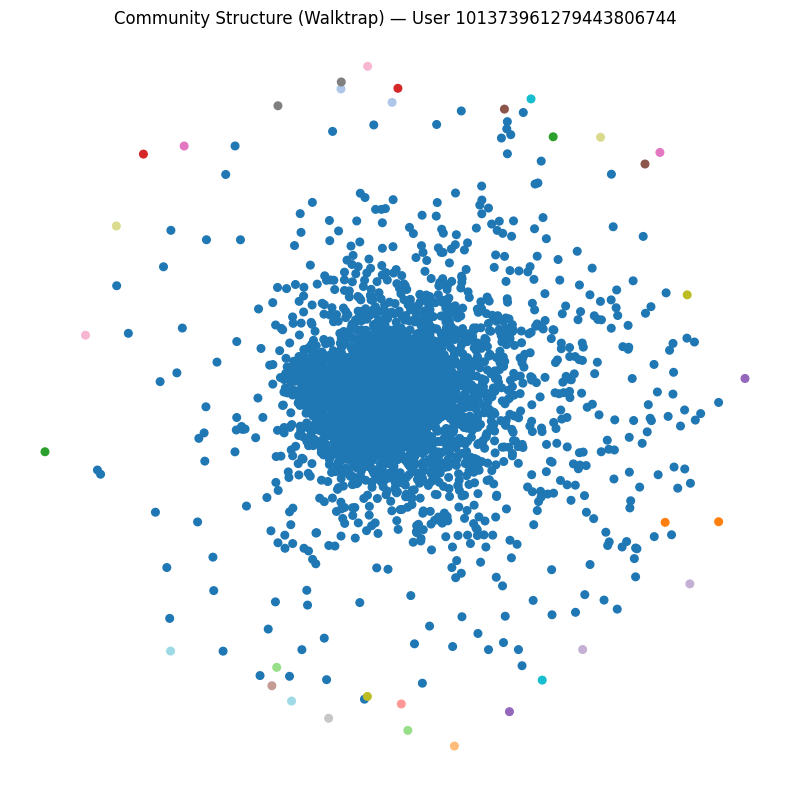

In [4]:
import igraph as ig
import matplotlib.pyplot as plt

def plot_walktrap_communities(nx_graph, user_id, max_edges=2000):
    # Convert to undirected for Walktrap
    G_undirected = nx_graph.to_undirected()

    # Mapping for igraph conversion
    mapping = {node: idx for idx, node in enumerate(G_undirected.nodes())}
    reverse_mapping = {idx: node for node, idx in mapping.items()}
    edges = [(mapping[u], mapping[v]) for u, v in G_undirected.edges()]

    ig_graph = ig.Graph(edges=edges)
    ig_graph.vs["name"] = list(mapping.keys())

    # Walktrap community detection
    clusters = ig_graph.community_walktrap().as_clustering()
    modularity = clusters.modularity
    membership = clusters.membership
    print(f"User {user_id} — Walktrap Modularity: {modularity:.4f}")

    layout = ig_graph.layout("fr")
    coords = list(zip(*layout.coords))

    plt.figure(figsize=(8, 8))
    plt.scatter(coords[0], coords[1], c=membership, cmap='tab20', s=30)

    # draw only a few edges
    if ig_graph.ecount() <= max_edges:
        for edge in ig_graph.es:
            source, target = edge.tuple
            x0, y0 = layout[source]
            x1, y1 = layout[target]
            plt.plot([x0, x1], [y0, y1], color='gray', linewidth=0.3, alpha=0.4)
    else:
        print(f"Skipping edge drawing for user {user_id} (too many edges: {ig_graph.ecount()})")

    plt.title(f"Community Structure (Walktrap) — User {user_id}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.close()

# List of users to process
user_ids = [
    "109327480479767108490",
    "115625564993990145546",
    "101373961279443806744"
]

# Run with RAM-safe plotting
for uid in user_ids:
    plot_walktrap_communities(personal_networks[uid], uid)

The modularity scores obtained from the algorithm are:
* User 109327480479767108490: 0.2577
* User 115625564993990145546: 0.3087
* User 101373961279443806744: 0.1734

The modularity scores are not similar. User 115625564993990145546 exhibits the highest modularity, indicating a more clearly defined community structure. User 101373961279443806744 has the lowest modularity, suggesting a less distinct division into communities.

While modularity scores indicate how well communities are separated in terms of edge density, they do not always align with the visual clarity of communities in 2D plots. In this case, the network with a lower modularity score (0.2577) appears more visually clustered due to its size and layout, while the network with higher modularity (0.3087) shows more overlap despite stronger mathematical separation.

# Question 21

Homogeneity and completeness are two entropy-based measures used to evaluate the relationship between user-defined circles and algorithmically detected communities in a social network.

Homogeneity measures the extent to which each community contains members from a single circle. It is defined as:


h = 1 - (H(C|K)/H(C))


where  H(C)  is the entropy of the circle distribution and  H(C|K)  is the conditional entropy of circles given communities. A homogeneity score close to 1 indicates that the communities are “pure,” meaning most of the nodes in a community belong to the same circle. A lower value indicates that communities contain a mix of nodes from different circles.

Completeness measures the extent to which all members of a circle are assigned to the same community. It is defined as:


c = 1 - (H(K|C)/H(K))


where  H(K)  is the entropy of the community distribution and  H(K|C)  is the conditional entropy of communities given circles. A completeness score close to 1 indicates that members of a circle are grouped together in the same community. A lower value means the nodes in a circle are spread across multiple communities.



In summary, homogeneity reflects how well communities align internally with single circles, while completeness reflects how well circles are preserved as cohesive groups within the detected communities. Both measures range from 0 to 1, with higher values indicating stronger alignment between circles and communities.



# Question 22

In [5]:
import os
import math
import networkx as nx
import igraph as ig
from collections import defaultdict, Counter

# Helper to load circles
def load_circle_labels(user_id, data_dir):
    circles_path = os.path.join(data_dir, f"{user_id}.circles")
    circles = []
    with open(circles_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) > 1:
                circles.append(parts[1:])
    return circles

# Compute homogeneity and completeness
def compute_homogeneity_completeness(circles, communities):
    # Build sets
    C = [set(c) for c in circles]
    K = [set(comm) for comm in communities]

    # Nodes with circle labels
    all_labeled_nodes = set(node for circle in C for node in circle)
    N = len(all_labeled_nodes)

    if N == 0:
        return 0.0, 0.0

    # ai: size of circle i
    ai = [len(circle & all_labeled_nodes) for circle in C]

    # bi: number of labeled nodes in community
    bi = [len(comm & all_labeled_nodes) for comm in K]

    # Aji: number of nodes in community j and circle i
    A = [[len(comm & circle) for circle in C] for comm in K]

    # Entropy H(C)
    H_C = -sum((a / N) * math.log(a / N) for a in ai if a > 0)

    # Entropy H(K)
    H_K = -sum((b / N) * math.log(b / N) for b in bi if b > 0)

    # Conditional entropy H(C|K)
    H_C_given_K = 0
    for j in range(len(K)):
        for i in range(len(C)):
            Aji = A[j][i]
            if Aji > 0:
                H_C_given_K -= (Aji / N) * math.log(Aji / bi[j])

    # Conditional entropy H(K|C)
    H_K_given_C = 0
    for i in range(len(C)):
        for j in range(len(K)):
            Aji = A[j][i]
            if Aji > 0:
                H_K_given_C -= (Aji / N) * math.log(Aji / ai[i])

    # Final scores
    h = 1 - H_C_given_K / H_C if H_C > 0 else 1.0
    c = 1 - H_K_given_C / H_K if H_K > 0 else 1.0
    return h, c

# Convert NetworkX to igraph undirected
def nx_to_igraph_undirected(nx_graph):
    G_undirected = nx_graph.to_undirected()
    mapping = {node: idx for idx, node in enumerate(G_undirected.nodes())}
    reverse_mapping = {idx: node for node, idx in mapping.items()}
    edges = [(mapping[u], mapping[v]) for u, v in G_undirected.edges()]
    ig_graph = ig.Graph(edges=edges)
    ig_graph.vs["name"] = list(mapping.keys())
    return ig_graph

# Users and data_dir
user_ids = [
    "109327480479767108490",
    "115625564993990145546",
    "101373961279443806744"
]

data_dir = "gplus/gplus"

# Final computation loop
for uid in user_ids:
    # Load network and convert
    G_nx = personal_networks[uid]
    G_ig = nx_to_igraph_undirected(G_nx)

    # Run Walktrap
    clusters = G_ig.community_walktrap().as_clustering()
    community_sets = []
    for cluster in clusters:
        members = [G_ig.vs[node]["name"] for node in cluster]
        community_sets.append(set(members))

    # Load circle labels
    circles = load_circle_labels(uid, data_dir)

    # Compute h and c
    h, c = compute_homogeneity_completeness(circles, community_sets)
    print(f"User {uid}: Homogeneity = {h:.4f}, Completeness = {c:.4f}")

User 109327480479767108490: Homogeneity = 0.8881, Completeness = 0.3955
User 115625564993990145546: Homogeneity = 0.4647, Completeness = -2.9843
User 101373961279443806744: Homogeneity = 0.0034, Completeness = -1.5098


| User ID                  | Homogeneity (h) | Completeness (c) |
|--------------------------|------------------|-------------------|
| 109327480479767108490    | 0.8881           | 0.3955            |
| 115625564993990145546    | 0.4647           | -2.9843           |
| 101373961279443806744    | 0.0034           | -1.5098           |



The homogeneity values are valid and show varying degrees of purity of communities with respect to circle membership. User 109327480479767108490 has high homogeneity, indicating that most communities contain nodes from a single circle. The other users show poor alignment.

The completeness values for two users are negative, which is theoretically invalid. This occurred due to numerical instability when the entropy of community distribution  H(K)  was close to zero, causing the ratio H(K|C)/H(K)
 to become large and result in a negative value for completeness. This suggests weak correspondence between circles and communities and potential mismatches or sparsity in the circle information.

# Question 23

# Question 24

# Question 25